# **EDA (Exploratory Data Analysis)**

In [2]:
# Melakukan import beberapa libary yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
assessment = pd.read_csv("/content/assessments.csv")
courses = pd.read_csv("/content/courses.csv")
student_assessment = pd.read_csv("/content/studentAssessment.csv")
student_registration = pd.read_csv("/content/studentRegistration.csv")
student_info = pd.read_csv("/content/studentInfo.csv")
student_vle = pd.read_csv("/content/studentVle.csv")
vle = pd.read_csv("/content/vle.csv")

# **Membaca dataset dari file CSV**

In [4]:
assessment.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [5]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


In [6]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [8]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [9]:
student_vle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400.0,546652.0,-10.0,4.0
1,AAA,2013J,28400.0,546652.0,-10.0,1.0
2,AAA,2013J,28400.0,546652.0,-10.0,1.0
3,AAA,2013J,28400.0,546614.0,-10.0,11.0
4,AAA,2013J,28400.0,546714.0,-10.0,1.0


In [10]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


# **Mengecek missing value**

In [11]:
print(assessment.isnull().sum())

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [12]:
#Handling missing value dengan mengisi dengan nilai mean
assessment['date'] = assessment['date'].fillna(int(assessment['date'].astype(float).mean()))

In [13]:
print(courses.isnull().sum())

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64


In [14]:
print(student_assessment.isnull().sum())

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [15]:
#Handling missing value dengan menghapus data kosong
student_assessment.dropna(axis=0, inplace=True)

In [16]:
print(student_registration.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [17]:
#Mengisi nilai kosong dengan nilai 0 dan yang melalukan unregis menjadi nilai 1, dan mengubah date_regis menjadi positif
student_registration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in student_registration['date_unregistration']]
student_registration['date_registration']   = student_registration['date_registration'].fillna(0).astype(float).apply(abs)

In [18]:
print(student_info.isnull().sum())

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [19]:
#Handling missing value dengan mengisi nilai kosong dengan nilai yang paling sering muncul
student_info['imd_band'] = student_info['imd_band'].fillna(student_info['imd_band'].mode()[0])

In [20]:
print(student_vle.isnull().sum())

code_module          0
code_presentation    1
id_student           1
id_site              1
date                 1
sum_click            1
dtype: int64


In [21]:
#Handling missing value dengan menghapus data kosong
student_vle.dropna(axis=0, inplace=True)

In [22]:
print(vle.isnull().sum())

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [23]:
#Handling missing value dengan menghapus data kosong
vle.dropna(axis=0, inplace=True)

# **Mengecek data duplikat**

In [24]:
assessment.duplicated().sum()

0

In [25]:
student_assessment.duplicated().sum()

0

In [26]:
student_registration.duplicated().sum()

0

In [27]:
student_info.duplicated().sum()

0

In [28]:
student_vle.duplicated().sum()

26510

In [29]:
student_vle = student_vle.drop_duplicates(keep=False)

In [30]:
vle.duplicated().sum()

0

#**Merging**#

In [31]:
#Fungsi untuk menampilkan stacked plot
def stacked_plot(data, column_one, column_two, agg_column, plot_size=(10, 5)):
    pal     = sns.color_palette("colorblind")
    grouped = data.groupby([column_one, column_two])[agg_column].count()
    grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    grouped = grouped.unstack(column_two).fillna(0)
    print(grouped)
    unique_list = list(data[column_two].unique())
    grouped[unique_list].plot(kind='bar', stacked=True, color=pal, figsize=plot_size)

In [32]:
#Menggabungkan tabel student_assessment dengan tabel assessment
student_assessment_merge_assessment = student_assessment.merge(assessment,
                                                                     on = ['id_assessment'], how='left' )

In [33]:
#Menentukan waktu pengumpulan terlambat atau tidak. jika date_submitted > date maka 0(terlambat) jika tidak maka 1(tidak terlambat)
student_assessment_merge_assessment['Late_submission'] = ['0' if int(student_assessment_merge_assessment['date_submitted'].iloc[i])
                                                          > int(student_assessment_merge_assessment['date'].iloc[i]) else '1'
                                                         for i in range(len(student_assessment_merge_assessment))]


In [34]:
print('Persentase keterlambatan pengumpulan tugas : ')
print((len(student_assessment_merge_assessment[student_assessment_merge_assessment['Late_submission']=='0'])/len(student_assessment_merge_assessment)*100))

Persentase keterlambatan pengumpulan tugas : 
29.958155624240963


<ipython-input-31-04d21c67d698>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Late_submission          0          1
code_module                          
AAA              25.810553  74.189447
BBB              47.472021  52.527979
CCC              69.063342  30.936658
DDD              30.566283  69.433717
EEE              14.544763  85.455237
FFF              10.345268  89.654732
GGG              10.049293  89.950707


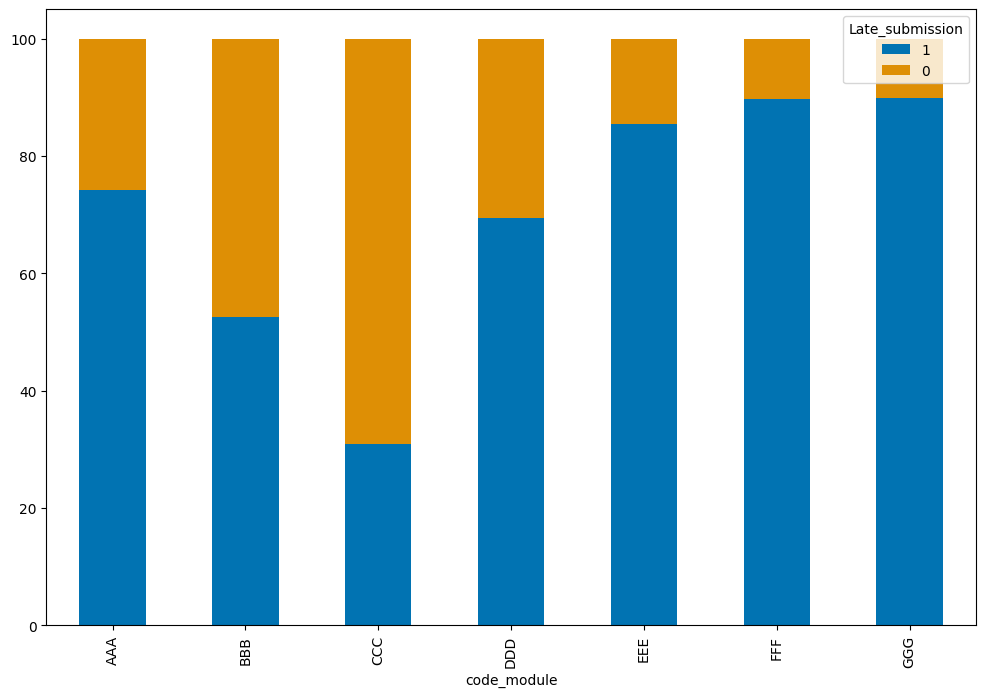

In [35]:
#Menampilkan banyaknya late submission pada tiap modul
stacked_plot(student_assessment_merge_assessment, 'code_module', 'Late_submission', 'id_student', plot_size=(12, 8))

In [36]:
#Membagi code modul dalam 2 jenis yaitu STEM dan Social sciene
student_assessment_merge_assessment['Code_Category'] = ['Social_Science' if student_assessment_merge_assessment['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                                        else 'STEM' for i in range(len(student_assessment_merge_assessment))]


<ipython-input-31-04d21c67d698>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  grouped = grouped.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))


Late_submission          0          1
Code_Category                        
STEM             26.072296  73.927704
Social_Science   37.078578  62.921422


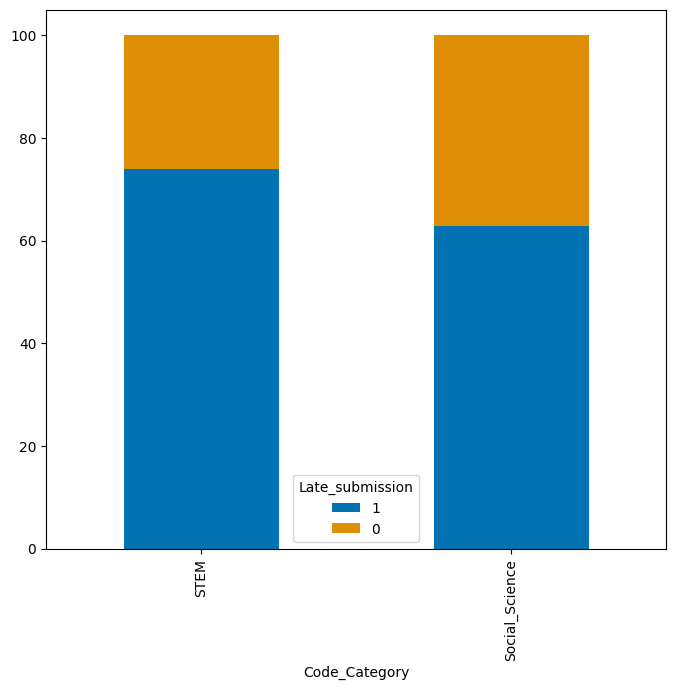

In [37]:
#Menampilkan banyaknya late submission dalam 2 tipe modul
stacked_plot(student_assessment_merge_assessment, 'Code_Category', 'Late_submission', 'id_student', plot_size=(8, 7))